In [1]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
baseline_data = np.load("../data/processed/baseline_scores.npz")
balanced_data = np.load("../data/processed/balanced_scores.npz")

y_test_baseline = baseline_data["y_test"]
y_proba_baseline = baseline_data["y_proba"]

y_test_balanced = balanced_data["y_test"]
y_proba_balanced = balanced_data["y_proba"]

In [3]:
def choose_threshold_by_min_precision(y_true, y_proba, min_precision=0.5):

    if len(y_true) != len(y_proba):
        raise ValueError(f"tamanhos diferentes: y_true{len(y_true)} vs y_proba{len(y_proba)}")
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    valid = np.where(precision[:-1] >= min_precision)[0]
    if len(valid) == 0:
        return thresholds[0], precision, recall, thresholds
    
    best_idx = valid[-1]
    return thresholds[best_idx], precision, recall, thresholds



print("y_test_balanced:", type(y_test_balanced), np.asarray(y_test_balanced).shape)
print("y_proba_balanced:", type(y_proba_balanced), np.asarray(y_proba_balanced).shape)
print("y_test uniques:", np.unique(np.asarray(y_test_balanced))[:10])

y_test_balanced: <class 'numpy.ndarray'> (56962,)
y_proba_balanced: <class 'numpy.ndarray'> (56962,)
y_test uniques: [0 1]


In [4]:
threshold, precision, recall, thresholds = choose_threshold_by_min_precision(
    y_test_balanced, y_proba_balanced, min_precision=0.50
)
threshold

np.float64(1.0)

In [5]:
y_pred_thr = (y_proba_balanced >= threshold).astype(int)

print(confusion_matrix(y_test_balanced, y_pred_thr))
print(classification_report(y_test_balanced, y_pred_thr))

[[56853    11]
 [   51    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.48      0.60        98

    accuracy                           1.00     56962
   macro avg       0.90      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



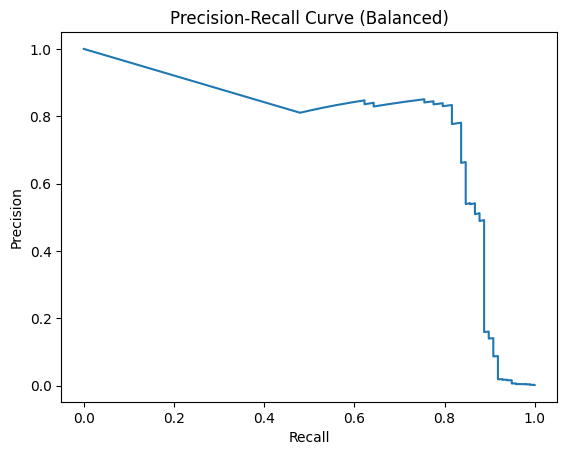

In [6]:
plt.plot(recall, precision)
plt.title("Precision-Recall Curve (Balanced)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [7]:
results = {
    "model": ["Balanced"],
    "min_precision_target": [0.50],
    "chosen_threshold": [float(threshold)]
}

pd.DataFrame(results).to_csv("../data/processed/threshold_summary.csv", index=False)